In [842]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
from keras import metrics
from keras.callbacks import EarlyStopping

In [843]:
from keras.datasets import fashion_mnist

In [844]:
num_classes = 10 # общее количество классов, в нашем случае это цифры от 0 до 9
num_features = 784 # количество атрибутов входного вектора 28 * 28 = 784
batch_size = 500 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов



In [845]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [846]:
train_data.shape, train_data.min(), train_data.max()

((60000, 28, 28), 0, 255)

In [847]:
train_labels, train_labels.shape , train_labels.min(), train_labels.max()

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8), (60000,), 0, 9)

In [848]:
y_train=tf.one_hot(train_labels, depth=num_classes)
y_test=tf.one_hot(test_labels, depth=num_classes)

In [849]:
x_train, x_test = np.array(train_data, np.float32), np.array(test_data, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
x_train, x_test = x_train / 255., x_test / 255.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [850]:
model=Sequential([
    Dense(512, activation='sigmoid', input_shape=(784,)),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax'),
])

In [851]:
model.compile(
    optimizer=optimizers.Adam(lr=0.001, epsilon=1e-03),
    loss=losses.CategoricalCrossentropy(),
    metrics=['categorical_accuracy'],
)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [852]:


callback_early_stopping = EarlyStopping(
    monitor="val_categorical_accuracy",
    min_delta=0.0001,
    patience=5,
)

In [853]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 512)               401920    
                                                                 
 dense_126 (Dense)           (None, 256)               131328    
                                                                 
 dense_127 (Dense)           (None, 128)               32896     
                                                                 
 dense_128 (Dense)           (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [854]:
history=model.fit(
    train_data,
    epochs=60,
    batch_size=batch_size,
    steps_per_epoch=150,
    validation_data=(x_test, y_test),
    #callbacks=[callback_early_stopping],
    verbose=1,
)

Epoch 1/60
150/150 [==============================] - 7s 43ms/step - loss: 2.2628 - categorical_accuracy: 0.2149 - val_loss: 2.1162 - val_categorical_accuracy: 0.2952
Epoch 2/60
150/150 [==============================] - 6s 37ms/step - loss: 1.5893 - categorical_accuracy: 0.5130 - val_loss: 1.1821 - val_categorical_accuracy: 0.5853
Epoch 3/60
150/150 [==============================] - 6s 37ms/step - loss: 1.0187 - categorical_accuracy: 0.6330 - val_loss: 0.9042 - val_categorical_accuracy: 0.6636
Epoch 4/60
150/150 [==============================] - 6s 42ms/step - loss: 0.8088 - categorical_accuracy: 0.7104 - val_loss: 0.7405 - val_categorical_accuracy: 0.7416
Epoch 5/60
150/150 [==============================] - 5s 35ms/step - loss: 0.6746 - categorical_accuracy: 0.7529 - val_loss: 0.6476 - val_categorical_accuracy: 0.7589
Epoch 6/60
150/150 [==============================] - 7s 44ms/step - loss: 0.6059 - categorical_accuracy: 0.7729 - val_loss: 0.5968 - val_categorical_accuracy: 0.781

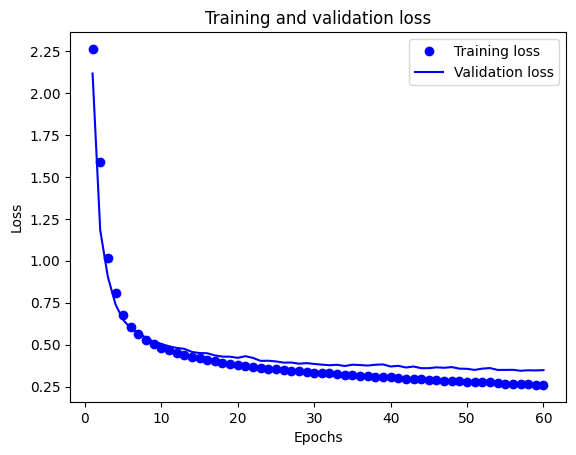

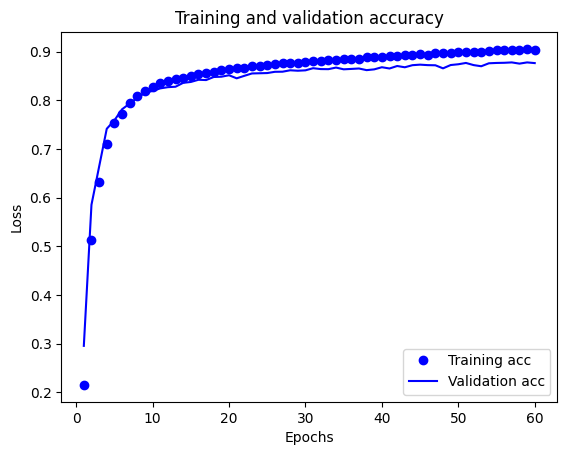

In [855]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['categorical_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_categorical_accuracy']
plt.plot(epochs, history_dict['categorical_accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_categorical_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [856]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 3ms/step - loss: 0.3480 - categorical_accuracy: 0.8767
[0.3479660749435425, 0.8766999840736389]


In [857]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


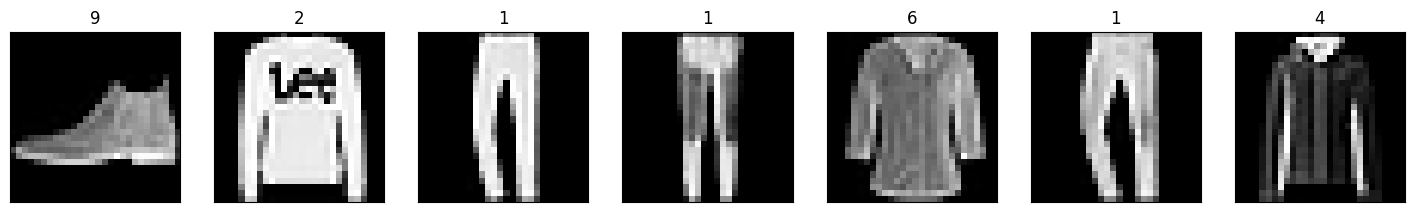

In [858]:
# Display some images
fig, axes = plt.subplots(ncols=7, sharex=False,
    sharey=True, figsize=(18, 6))
for i in range(7):
    axes[i].set_title(np.argmax(y_pred[i]))
    axes[i].imshow(test_data[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [859]:
for i in range(7):
  y_p=np.argmax(y_pred[i])
  y_true=test_labels[i]
  if y_p==y_true:
    print(f'{y_p}=={y_true}')
  else:
    print(f'{y_p} NOT {y_true}')

9==9
2==2
1==1
1==1
6==6
1==1
4==4


In [861]:
model.save("my_model")